**Financial Data Analysis**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('/content/drive/MyDrive/DATASET/Financial Sample.xlsx')
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [5]:
data.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

**Data Preprocessing**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [7]:
#Identifying null values.

data.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

Since there is no null value columns


In [8]:
#Identifying duplicate values.

data.duplicated().sum()

0

In [9]:

data[["Discounts"," Sales","Profit"]].describe()

,Discounts,Sales,Profit
count,700.000000,7.000000e+02,700.000000
mean,13150.354629,1.696091e+05,24133.860371
std,22962.928775,2.367263e+05,42760.626563
min,0.000000,1.655080e+03,-40617.500000
25%,800.320000,1.592800e+04,2805.960000
50%,2585.250000,3.554020e+04,9242.200000
75%,15956.343750,2.610775e+05,22662.000000
max,149677.500000,1.159200e+06,262200.000000


Statistical Summary:

Provides a summary of key numerical features such as Discounts, Sales and Profit.

Calculates and prints the total Net Profit, Total Sales, and Total Discounts in the dataset.

In [10]:
print(" Net Profit in this dataset is ${}M ".format((data["Profit"].sum()/1000000).round(2)))
print(" Total Sales in this dataset is ${}M ".format((data[" Sales"].sum()/1000000).round(2)))
print(" Total Discounts in this dataset is ${}M ".format((data["Discounts"].sum()/1000000).round(2)))

 Net Profit in this dataset is $16.89M 
 Total Sales in this dataset is $118.73M 
 Total Discounts in this dataset is $9.21M 


Total sales by each country.

In [11]:

df=data.groupby("Country")[" Sales"].sum()
df

Country
Canada                      2.488765e+07
France                      2.435417e+07
Germany                     2.350534e+07
Mexico                      2.094935e+07
United States of America    2.502983e+07
Name:  Sales, dtype: float64

In [12]:
df = df.reset_index()


In [13]:
df

,Country,Sales
0,Canada,2.488765e+07
1,France,2.435417e+07
2,Germany,2.350534e+07
3,Mexico,2.094935e+07
4,United States of America,2.502983e+07


**Country wise Analysis**

Presents a pie chart illustrating Sales and Profit distribution across different countries.

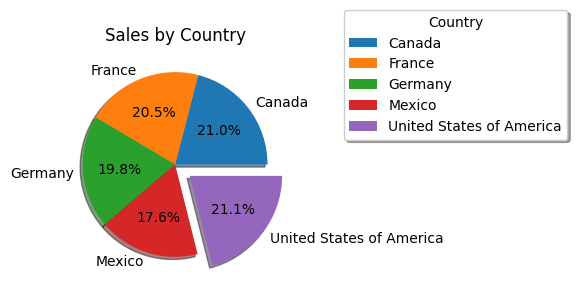

In [14]:
figure = plt.figure(figsize =(10, 3))
df=data.groupby("Country")[" Sales"].sum()
plt.pie(df,labels=df.index,shadow="True",explode = [0, 0, 0, 0,0.2],autopct='%1.1f%%')
plt.legend(title = "Country",bbox_to_anchor=(1.2, 1.2),loc='upper left',shadow="True")
plt.title("Sales by Country")
plt.show()


In [15]:
df1=data.groupby("Country")["Profit"].sum()
df1

Country
Canada                      3529228.885
France                      3781020.780
Germany                     3680388.820
Mexico                      2907523.110
United States of America    2995540.665
Name: Profit, dtype: float64

In [16]:
df1 = df1.reset_index()
df1


,Country,Profit
0,Canada,3529228.885
1,France,3781020.780
2,Germany,3680388.820
3,Mexico,2907523.110
4,United States of America,2995540.665


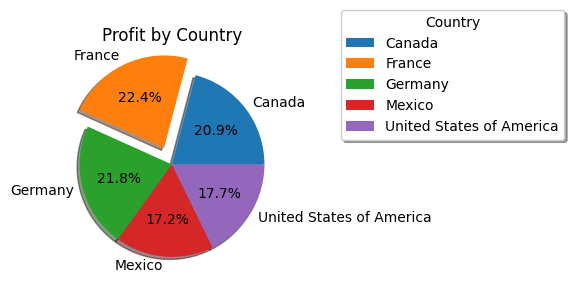

In [17]:
figure = plt.figure(figsize =(10, 3))
df=data.groupby("Country")["Profit"].sum()
plt.pie(df,labels=df.index,shadow="True",explode = [0, 0.2, 0, 0,0],autopct='%1.1f%%')
plt.legend(title = "Country",bbox_to_anchor=(1.2, 1.2),loc='upper left',shadow="True")
plt.title("Profit by Country")
plt.show()

**Product wise Profit**

Displays a horizontal bar plot showing the profit distribution for different products.

Presents a bar plot illustrating profit distribution across different segments.

In [18]:
df=data.groupby("Product")["Profit"].sum().sort_values(ascending=False)

In [19]:
df = df.reset_index()
df

,Product,Profit
0,Paseo,4797437.950
1,VTT,3034608.020
2,Amarilla,2814104.060
3,Velo,2305992.465
4,Montana,2114754.880
5,Carretera,1826804.885


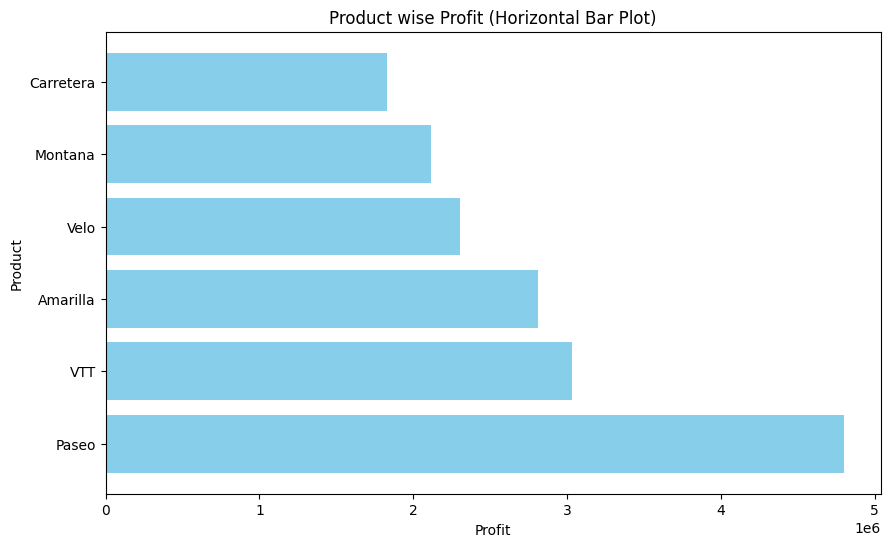

In [20]:
# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(df['Product'], df['Profit'], color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.title('Product wise Profit (Horizontal Bar Plot)')
plt.show()

**Segment wise Pofit**

In [21]:
df=data.groupby("Segment")["Profit"].sum().sort_values(ascending=False)
df=df.reset_index()
df

,Segment,Profit
0,Government,1.138817e+07
1,Small Business,4.143168e+06
2,Channel Partners,1.316803e+06
3,Midmarket,6.601031e+05
4,Enterprise,-6.145456e+05


<Figure size 1000x600 with 0 Axes>

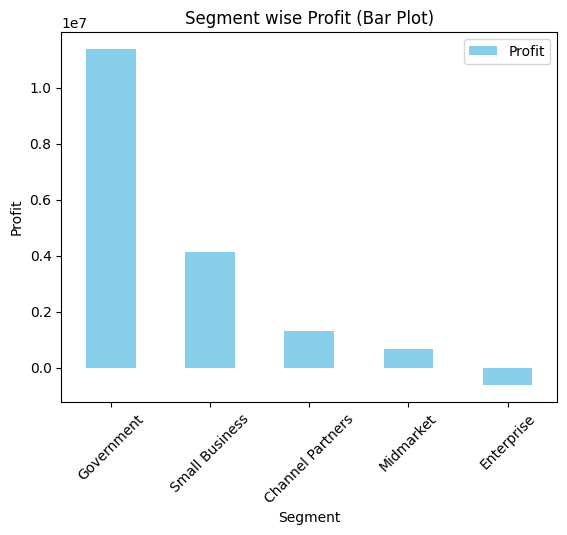

In [22]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar', color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Segment wise Profit (Bar Plot)')
plt.xticks(df.index, ['Government', 'Small Business', 'Channel Partners', 'Midmarket', 'Enterprise'], rotation=45)
plt.show()

**Discount Band Analysis**

Analyzes unit sales and net sales across different discount bands using line and bar plots.

In [23]:
df=data.groupby("Discount Band")["Units Sold"].sum().sort_values(ascending=False)
df=df.reset_index()
df

,Discount Band,Units Sold
0,High,398085.5
1,Medium,379698.5
2,Low,261858.5
3,None,86163.5


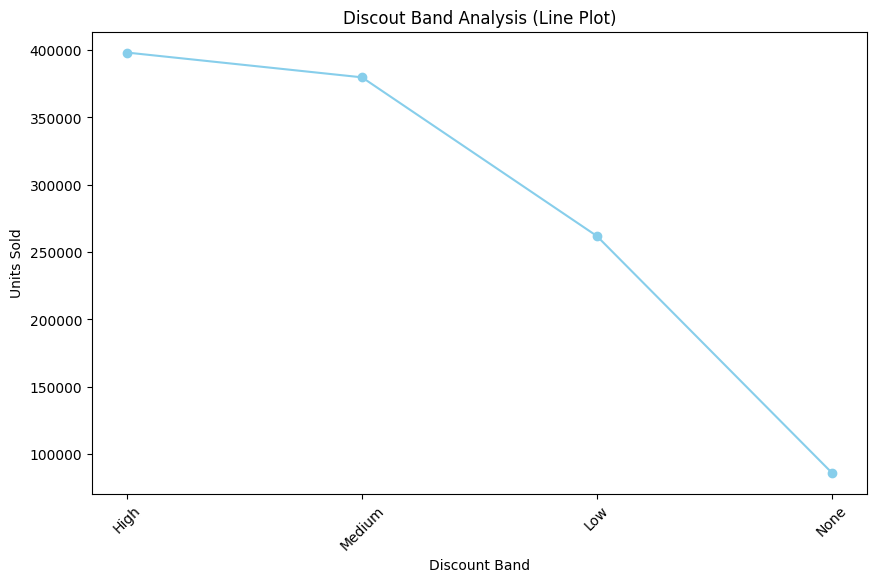

In [24]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Discount Band'], df['Units Sold'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Discount Band')
plt.ylabel('Units Sold')
plt.title('Discout Band Analysis (Line Plot)')
plt.xticks(df.index, ['High', 'Medium', 'Low', 'None'], rotation=45)
plt.show()


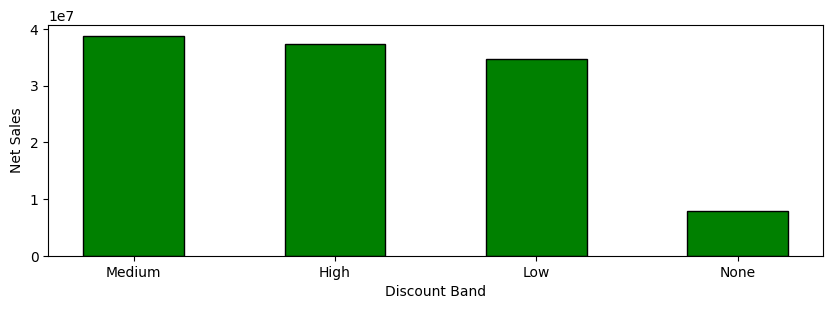

In [28]:
figure = plt.figure(figsize =(10, 3))
df=data.groupby("Discount Band")[" Sales"].sum().sort_values(ascending=False)
plt.bar(df.index,df,color='g',edgecolor="black",width=0.5)
plt.xlabel('Discount Band')
plt.ylabel('Net Sales')
plt.show()

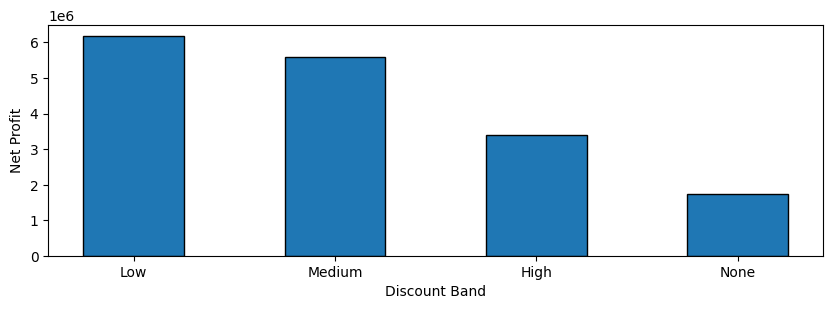

In [29]:
figure = plt.figure(figsize =(10, 3))
df=data.groupby("Discount Band")["Profit"].sum().sort_values(ascending=False)
plt.bar(df.index,df,edgecolor="black",width=0.5)
plt.xlabel('Discount Band')
plt.ylabel('Net Profit')
plt.show()